In [116]:
from glob import glob
import mahotas as mh
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [117]:
# 어떤 사진들이 있는지 확인

images = glob('../crawling/naver/total_img/*.png')
len(images)

26063

In [118]:
# 라벨 자르기 코드

images[1521][28:-len('.png')].split(",")[0]

'패밀리 사이즈'

In [119]:
# gray로 바꾸기
# 색상에 대한 차원을 3차원에서 1차원으로 바꾼다
# 보통 이미지 비교에서는, 조도의 영향을 제거하기위해 gray로 색상을 바꾼다
# haralick 모듈 알고리즘이 칼라 이미지를 구분하지 않는다

im = mh.imread(images[0])
im = mh.colors.rgb2gray(im, dtype=np.uint8)
im

array([[ 58,  58,  58, ..., 150, 150, 150],
       [ 58,  58,  58, ..., 149, 149, 149],
       [ 58,  58,  58, ..., 149, 148, 148],
       ...,
       [ 39,  38,  38, ...,  64,  64,  64],
       [ 39,  38,  38, ...,  64,  64,  65],
       [ 39,  37,  38, ...,  63,  63,  60]], dtype=uint8)

In [120]:
im.shape

(120, 202)

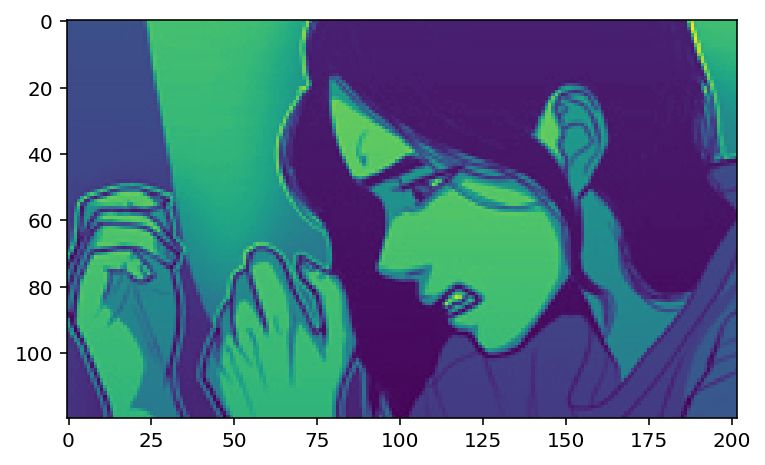

In [121]:
plt.imshow(im);

In [122]:
# 이미지의 날카로움을 잘 드러낸다는 haralick 모듈 알고리즘을 적용해보기

mh.features.haralick(im)

array([[ 4.31452553e-03,  3.93451161e+02,  9.24810017e-01,
         2.61638018e+03,  4.97749867e-01,  1.49565174e+02,
         1.00720696e+04,  7.68954116e+00,  1.04431416e+01,
         8.77233343e-04,  3.79619725e+00, -4.55984714e-01,
         9.98951970e-01],
       [ 3.32203258e-03,  4.79678540e+02,  9.08379123e-01,
         2.61773602e+03,  4.50021888e-01,  1.49678373e+02,
         9.99126555e+03,  7.75749996e+00,  1.06473948e+01,
         7.70116685e-04,  3.94494879e+00, -4.25660721e-01,
         9.98419349e-01],
       [ 3.58981509e-03,  2.50729220e+02,  9.51971891e-01,
         2.61023413e+03,  4.94563946e-01,  1.49593186e+02,
         1.01902073e+04,  7.73898813e+00,  1.03422407e+01,
         9.22829049e-04,  3.51479319e+00, -4.71394363e-01,
         9.99150993e-01],
       [ 3.23089238e-03,  5.63962122e+02,  8.92286090e-01,
         2.61787043e+03,  4.49810663e-01,  1.49681341e+02,
         9.90751959e+03,  7.76644701e+00,  1.06842162e+01,
         7.66164790e-04,  3.99221728e

In [123]:
mh.features.haralick(im).ravel().shape

(52,)

In [129]:
# 이미지간 유사도 검출을 위해 이미지를 특성데이터(벡터)로 변환

import time

features = []
labels = []

start = time.time()
for im in images:
    labels.append(im[28:-len('.png')].split(",")[0])
    im = mh.imread(im)
    
    try:
        im = mh.colors.rgb2gray(im, dtype=np.uint8)
        features.append(mh.features.haralick(im).ravel())
    except Exception:
        features.append(mh.features.haralick(im).ravel())
    
print('fit time : ', time.time() - start)

fit time :  327.8998782634735


In [132]:
for i, each_feature in enumerate(features):
    if len(each_feature) != 52:
        print('not 52', i)

not 52 25814


In [131]:
len(features)

26063

In [137]:
del features[25814]

In [138]:
len(features)

26062

In [140]:
# features[25814]

In [141]:
len(labels)

26063

In [142]:
del labels[25814]

In [143]:
len(labels)

26062

In [145]:
# 결과를 np.array에 담기

features = np.array(features)
labels = np.array(labels)

In [146]:
features.shape

(26062, 52)

In [147]:
# features

In [148]:
len(set(labels))

322

In [149]:
# set(labels)

In [150]:
# 이렇게 전처리를 끝낸 내용물에 scaler와 logistic regression 적용하기

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

clf = Pipeline([('preproc', StandardScaler()),
                ('classifier', LogisticRegression())])
clf

Pipeline(memory=None,
         steps=[('preproc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [151]:
# cv 정확도 체크

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, features, labels)
scores

/Users/song-yeejun/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/song-yeejun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/song-yeejun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increa

array([0.26242087, 0.257817  , 0.25556408, 0.2538373 , 0.25306984])

In [152]:
print('Accuracy: {:.2%}'.format(scores.mean()))

Accuracy: 25.65%


In [157]:
# 이 위에서는 유사도가 아니라 분류 알고리즘을 
# 90장의 사진에 대해 적용시켜서 분류 정확도가 어떻게 되는지 한번 본 거임

In [158]:
# 여기서부터는 유사도 비교하기.
# 유사도는 학습하지 않는 머신러닝이다
# 이미지나 텍스트를 벡터화 시켜서 벡터간의 거리를 비교하는 것일 뿐임 
# 다시 label과 feature에 scaler를 손으로 적용하기

from scipy.spatial import distance

sc = StandardScaler()
features = sc.fit_transform(features)

# 각 이미지 픽셀을 1열로 펼쳐서 만든 벡터들을 하나씩 대응시켜서 거리를 비교하고,
# 정방행렬인 유사도 행렬이 나온다

dists = distance.squareform(distance.pdist(features))

In [159]:
dists.shape

(26062, 26062)

In [160]:
dists

array([[ 0.        ,  9.07174819,  6.55405276, ...,  7.84048074,
        10.84153165,  7.85419863],
       [ 9.07174819,  0.        ,  9.49966991, ..., 10.60120372,
        11.22334588,  6.45492235],
       [ 6.55405276,  9.49966991,  0.        , ...,  4.02932441,
         7.83507386,  6.95229829],
       ...,
       [ 7.84048074, 10.60120372,  4.02932441, ...,  0.        ,
         6.19771512,  6.13993296],
       [10.84153165, 11.22334588,  7.83507386, ...,  6.19771512,
         0.        ,  6.32424815],
       [ 7.85419863,  6.45492235,  6.95229829, ...,  6.13993296,
         6.32424815,  0.        ]])

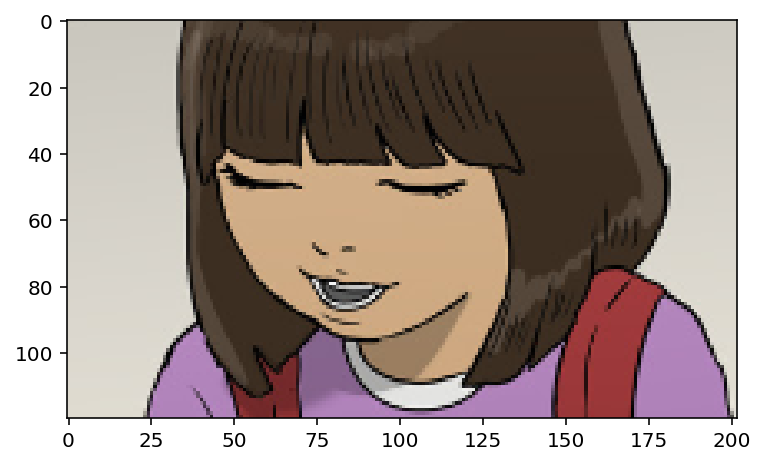

In [171]:
plt.imshow(mh.imread(images[25814]));

In [172]:
del images[25814]

In [161]:
# 유사한 이미지를 찾는 함수

def selectImage(n, m, dists, images):
    image_position = dists[n].argsort()[m]
    image = mh.imread(images[image_position])
    return image

In [162]:
# 비슷한 이미지를 찾아서 네개씩 화면에 그리는 함수

def plotImages(n):
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    
    for i in range(4):
        ax[i].imshow(selectImage(n, i, dists, images))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        
    plt.show()

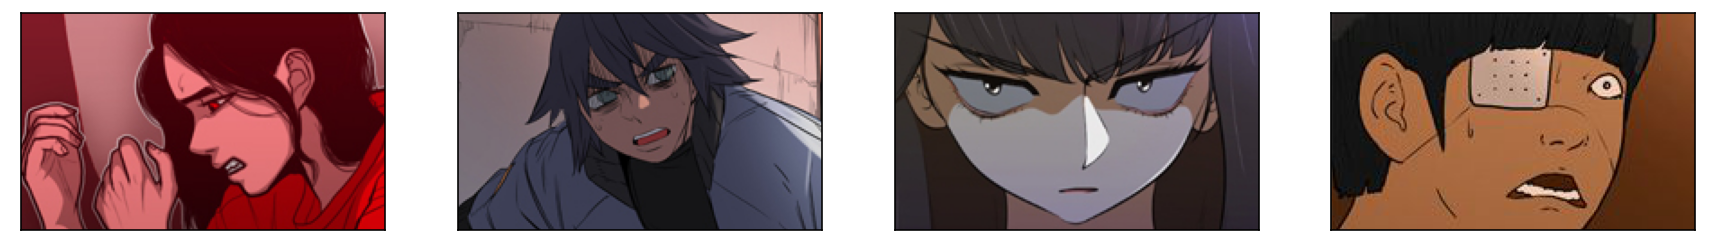

In [163]:
plotImages(0)

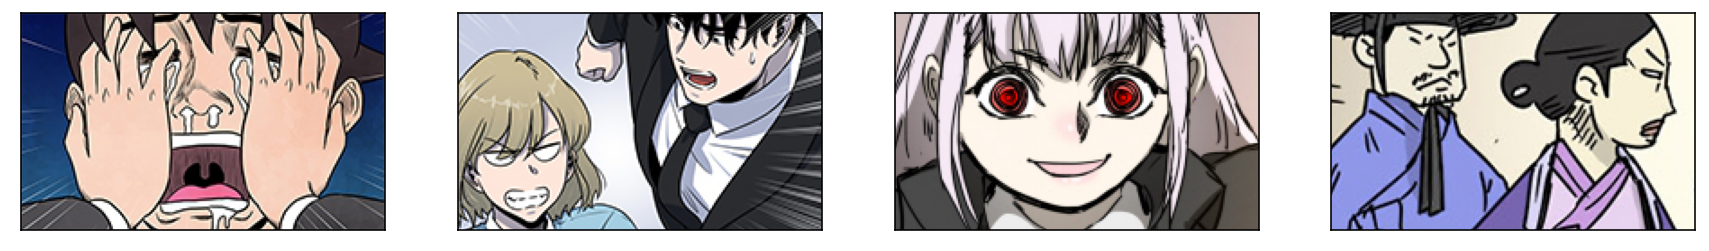

In [164]:
plotImages(11)

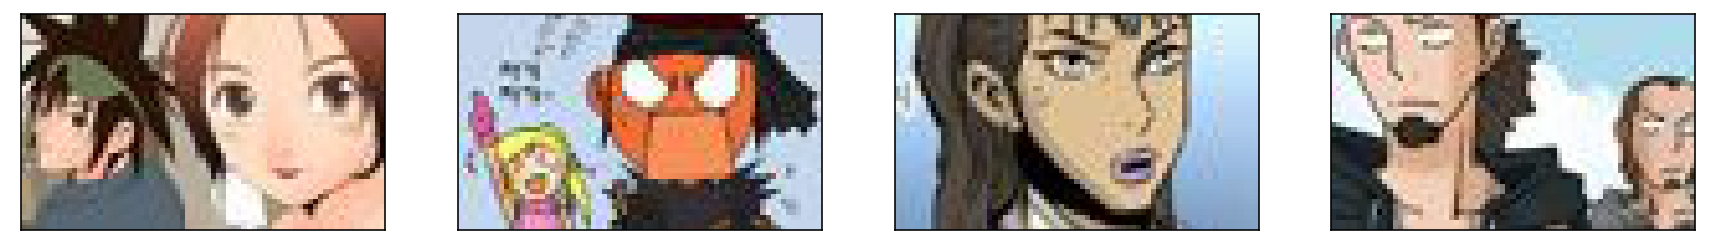

In [165]:
plotImages(32)

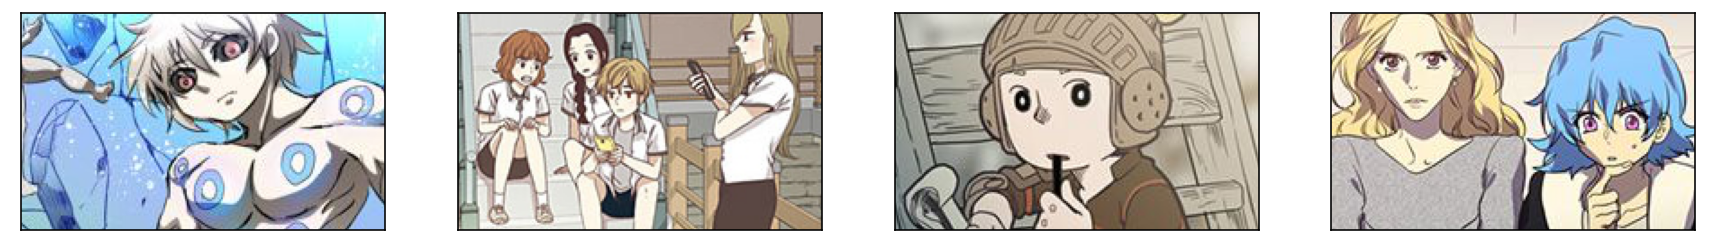

In [166]:
plotImages(1234)

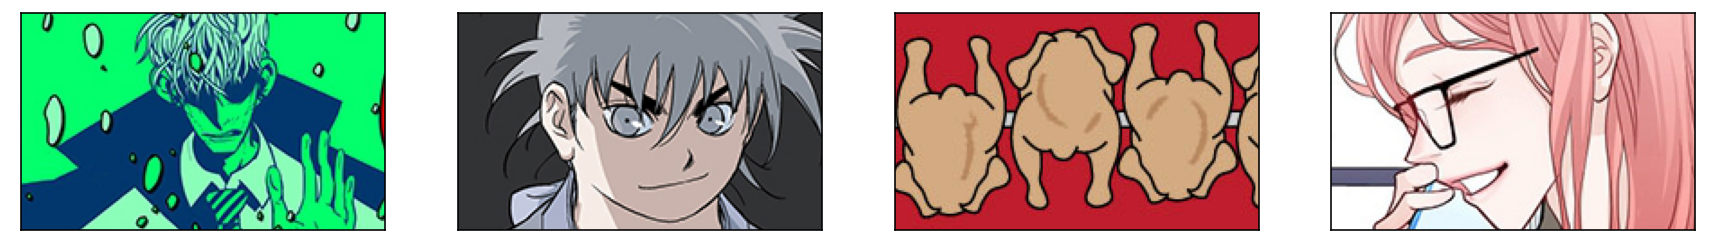

In [167]:
plotImages(5924)